# Import the various packages and the file containing the modes.

In [2]:
import poppy
import numpy as np
import astropy.units as u
import astropy.io.fits as fits
from pathlib import Path
import os
import psutil

from importlib import reload
import misc
reload(misc)
import poppy_romancgi_modes as modes
reload(modes)
import polmap
reload(polmap)

from IPython.display import clear_output, display
clear_output()

## Check what packages are available for faster computations and use POPPY's configuration feature to set the options. 

The numexpr package only speeds up some calculations, but not the FFTs. POPPY defaults to numexpr if available, unless the user sets the conf value to False. 

MKL tends to be faster than pyFFTW so POPPY defaults to that if available, unless its conf value is set to False, in which case pyFFTW is used. If pyFFTW is not available or its conf value is set to False, poppy uses standard numpy FFTs.

OPENCL uses a GPU so it tends to be faster than MKL and POPPY defaults to that if available, onca again unless the user sets the conf value to False.

No testing was done with CUDA because a necessary package called pyculib must be installed, which has since been depreciated. 

In [3]:
import poppy.accel_math as am
print(am._USE_NUMEXPR)
print(am._USE_FFTW)
print(am._USE_MKL)
print(am._USE_OPENCL)
print(am._USE_CUDA)
poppy.conf.use_numexpr = True
poppy.conf.use_fftw = True
poppy.conf.use_mkl = True
poppy.conf.use_opencl = False
poppy.conf.use_cuda = False

True
True
True
False
False


# Set the parameters of the mode being run and calculate a PSF. 
Both the PSF and the POPPY FresnelWavefront objects of each plane are returned by default. Note, these wavefront objects can take up quite a bit of memory. 

DEBUG:poppy:Padded WF array for oversampling by 2, to (2000, 2000).

Employing polarization aberrations.



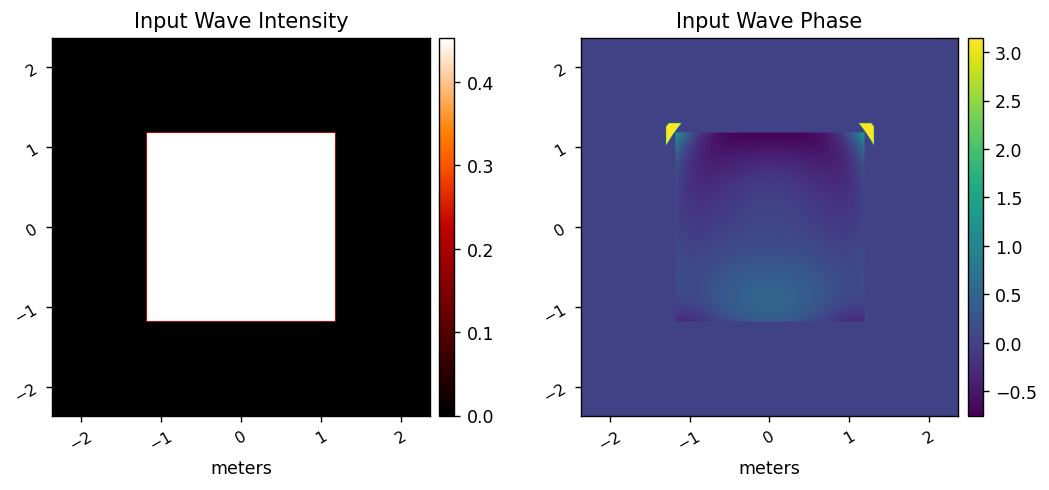

INFO:poppy:Initialized OpticalSystem: SPC730
INFO:poppy:Added optic: Roman Pupil after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: G2O OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary after separation: 2.29e+00 m 
INFO:poppy:Added optic: Secondary OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: Fold 1 after separation: 2.99e+00 m 
INFO:poppy:Added optic: Fold-1 OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: M3 after separation: 1.68e+00 m 
INFO:poppy:Added optic: M3 OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: M4 after separation: 9.44e-01 m 
INFO:poppy:Added optic: M4 OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: M5 after separation: 4.29e-01 m 
INFO:poppy:Added optic: M5 OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: Fold 2 after separation: 3.51e-01 m 
INFO:poppy:Added optic: Fo

DEBUG:poppy:Output beam focal length is now 18.371087807391802 m
DEBUG:poppy:Spherical to Spherical wavefront propagation.
DEBUG:poppy:1/fl=-1.5286e+00 1 / m
DEBUG:poppy:1.0/(R_input_beam)=-1.8079e+00 1 / m
DEBUG:poppy:1.0/(self.z-self.z_w0)=-2.7931e-01 1 / m
DEBUG:poppy:Applying spherical phase curvature =1.72e+10 m
DEBUG:poppy:Applying spherical lens phase =5.81e-11 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Secondary
DEBUG:poppy:------ Optic: Secondary applied ------
DEBUG:poppy:  Propagating wavefront to Optic: Secondary OPD after distance 0.0 m 
DEBUG:poppy:Array shape (2048, 2048) is larger than desired shape [2000, 2000]; will crop out just the center part.
DEBUG:poppy:  Trimmed a border of 24 x 24 pixels to match the desired shape
DEBUG:poppy:  Multiplied WF by phasor for Optic: Secondary OPD
DEBUG:poppy:  Propagating wavefront to Optic: Fold 1 after distance 2.993753476654728 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 5.865339431365685 m
DEBUG:poppy:  Sphe

DEBUG:poppy:  Propagating wavefront to Lens: M5, with focal length 0.198821518772608 m after distance 0.429145636743193 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 8.133678566975933 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 4.6614491106935295e-05 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.23032398390341413 m
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.021331 s, full function  in 0.033 s
DEBUG:poppy:Applying spherical phase curvature =2.30e-01 m
DEBUG:poppy:Applying spherical lens phase =4.34e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 1.8034789639103986e-06 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=0.19882165283977926 m
DEBUG:poppy:Applying spherical phase curvature =1.99e-01 m
DEBUG:poppy:Applying spherical lens phase =5

DEBUG:poppy:  Trimmed a border of 24 x 24 pixels to match the desired shape
DEBUG:poppy:  Multiplied WF by phasor for Optic: FOCM OPD
DEBUG:poppy:  Propagating wavefront to Lens: OAP2, with focal length 0.579156922073536 m after distance 0.314483210543378 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 9.907188083462472 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 2.115933059386994e-05 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=-0.2646737535499142 m
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.021823 s, full function  in 0.028 s
DEBUG:poppy:Applying spherical phase curvature =-2.65e-01 m
DEBUG:poppy:Applying spherical lens phase =-3.78e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 4.565641602750247e-06 m / pix
DEBUG:poppy:Waist to Spherical propag

DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.020337 s, full function  in 0.030 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.32e+01 m ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: Fold 3
DEBUG:poppy:  Propagating wavefront to Optic: Fold-3 OPD after distance 0.0 m 
DEBUG:poppy:Array shape (2048, 2048) is larger than desired shape [2000, 2000]; will crop out just the center part.
DEBUG:poppy:  Trimmed a border of 24 x 24 pixels to match the desired shape
DEBUG:poppy:  Multiplied WF by phasor for Optic: Fold-3 OPD
DEBUG:poppy:  Propagating wavefront to Lens: OAP4, with focal length 0.446951159052363 m after distance 1.158897671642761 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 13.874230757469238 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:popp

DEBUG:poppy:Inverse MatrixFourierTransform: array shape (361, 361), centering style ADJUSTABLE, output region size 36.1 in lambda / D units, output array size 2000 pixels, offset None
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.025294 s, full function  in 0.055 s
DEBUG:poppy:------ FITs FPM Optic: BOWTIE FPM applied ------
DEBUG:poppy:  Propagating wavefront to Lens: OAP6, with focal length 0.548189083164429 m after distance 0.548189083164429 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 15.701194120704749 m
DEBUG:poppy:  Plane to Spherical Regime, inside Z_R to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 1.176964836139641e-05 m / pix
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.018352 s, full function  in 0.024 s
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.020335 s, full function  in 0.0

DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:1.936e-05 m, z_w0=1.805e+01 m
z=1.826e+01 m, z_r=1.613e-03 m
DEBUG:poppy: input curved wavefront and OAP8 has output beam curvature of =-2.78e+03 m
DEBUG:poppy:OAP8 has a curvature of =-2.78e+03 m
DEBUG:poppy:OAP8 has a curved output wavefront, with waist at 18.531776282806806 m
DEBUG:poppy:Post Optic Parameters:w_0:2.532e-03 m, z_w0=1.853e+01 m
z=1.826e+01 m, z_r=2.759e+01 m
DEBUG:poppy:Magnification: -13179.957733668853  from R_in = 0.2109896417842272 m, R_out = -2780.834560958046 m
DEBUG:poppy:Output beam focal length is now -0.0 m
DEBUG:poppy:Spherical to Planar.
DEBUG:poppy:Applying spherical phase curvature =-1.21e+04 m
DEBUG:poppy:Applying spherical lens phase =-8.25e-05 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP8
DEBUG:poppy:------ Optic: OAP8 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: OAP8 OPD after distance 0.0 m 
DEBUG:poppy:Array shape (4096, 4096) is larger than desired shape [2000, 2000]; will cr

<Figure size 1080x1080 with 0 Axes>

FPM pixelscale:  1.176964836139641e-05 m / pix


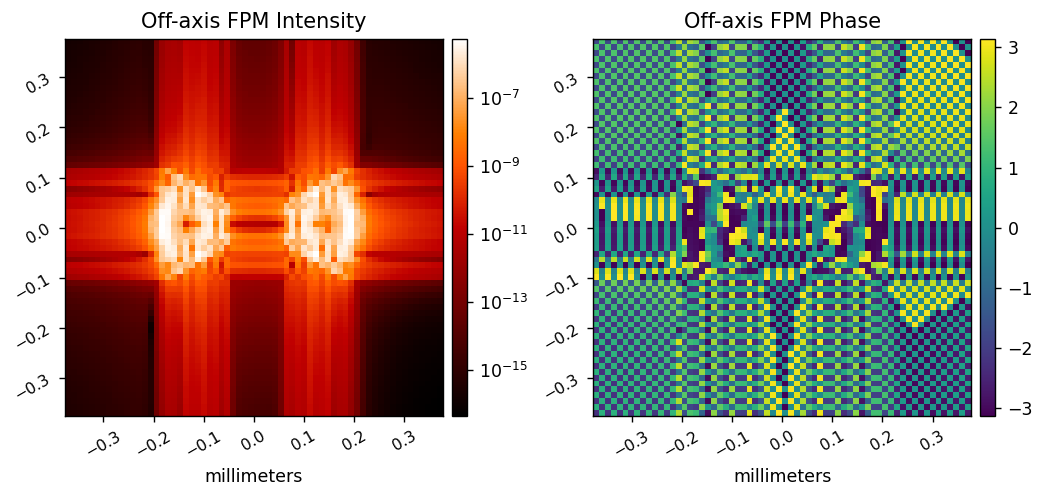

PSF pixelscale:  2.133167626733244e-05 m / pix


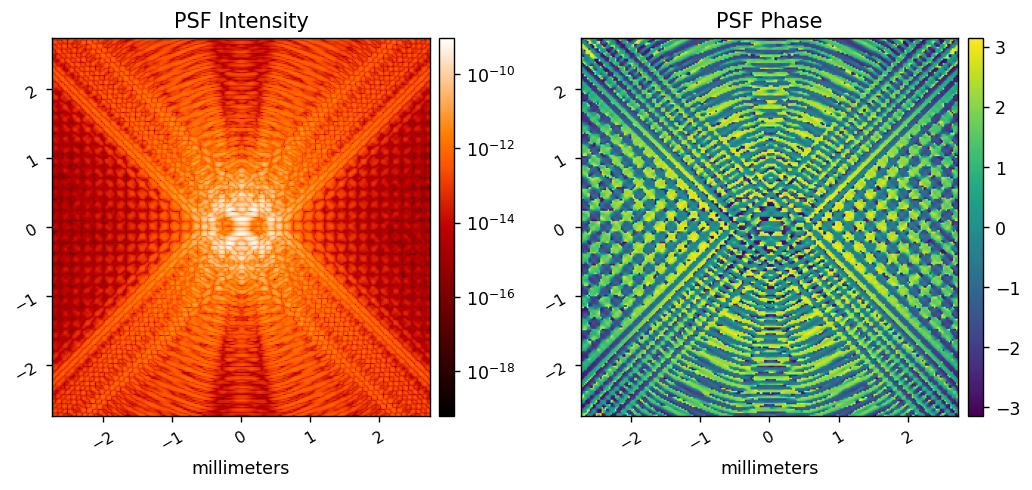

In [4]:
reload(modes)

mode = 'SPC730'
use_dms = True
use_opds = True
use_apertures = False
use_fieldstop = False
polaxis = 10
cgi_dir = Path('C:/Users/Kian Milani/Desktop/webbpsf-data/CGI')
psf, wfs = modes.run_model(npix=1000,
                           oversample=2,
                           mode=mode,
#                            lambda_m=730e-9*u.m, 
#                            offsets=(4.5,0),
                           use_fpm=True,
                           use_opds=use_opds,
                           use_dms=use_dms, 
                           use_fieldstop=use_fieldstop,
                           use_apertures=use_apertures,
                           polaxis=polaxis,
                           cgi_dir=cgi_dir,
                           display_mode=False,
                           display_inwave=True,
                           display_intermediates=False,
                           display_fpm=True,
                           display_psf=True)

PROPER wavefront pixelscale:  4.26692839634194e-06 m / pix
PROPER wavefront pixelscale in λ/D:  0.1
Input POPPY wavefront pixelscale:  2.133167626733244e-05 m / pix
Interpolated POPPY wavefront pixelscale:  4.26692839634194e-06 m / pix


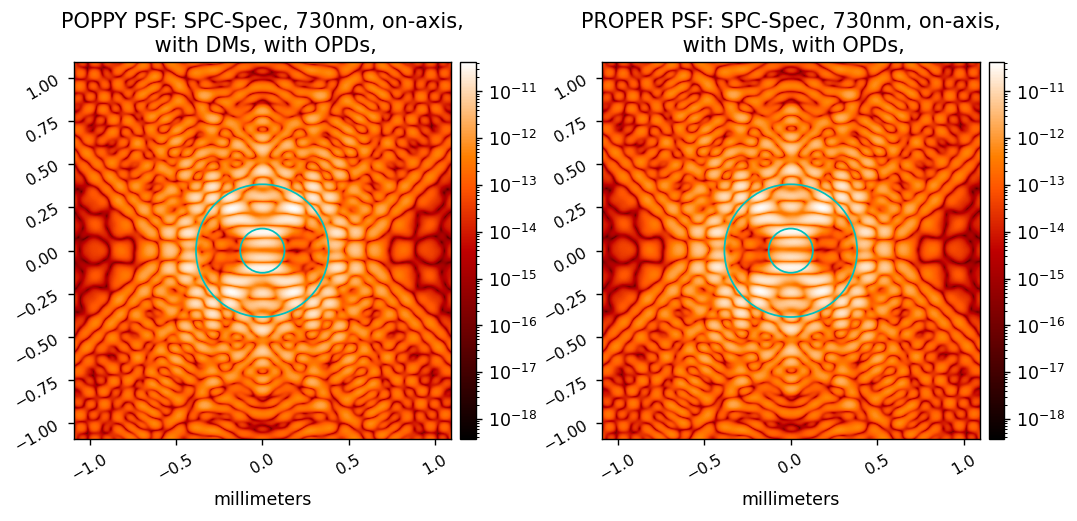

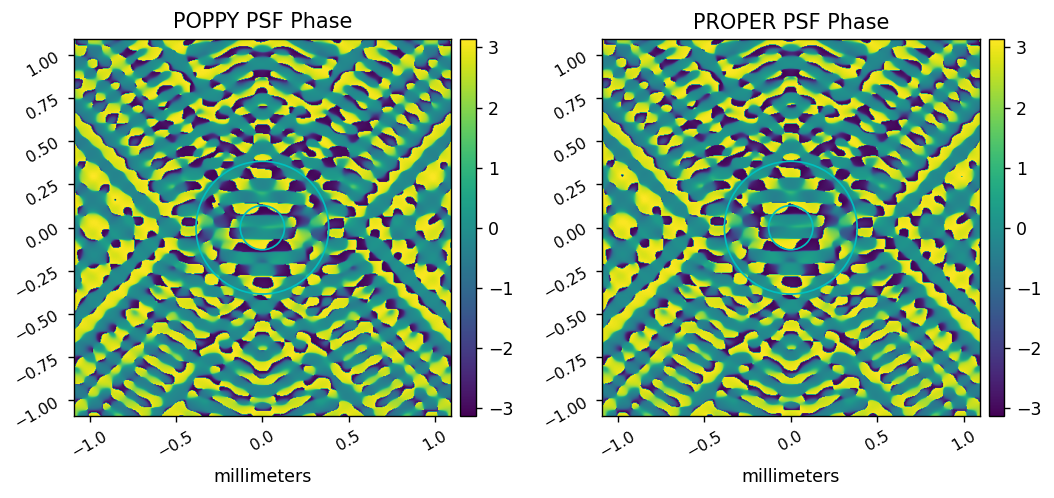

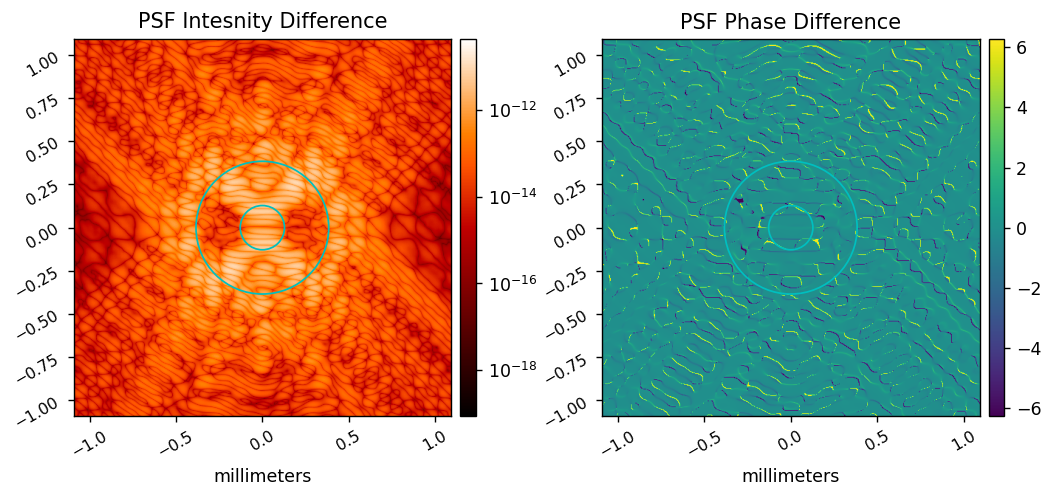

In [16]:
reload(modes)
reload(misc)
prop_psf_fpath = Path('proper-psfs/spc-spec/proper_psf_onax_opds_dms.fits')
modes.compare_psfs(wfs[-1], prop_psf_fpath)


# Save the wavefronts to a specific directory if desired. 

In [19]:
reload(modes)
modes.save_waves(wfs, use_apertures, use_opds, npix=1000, wfdir=Path('C:/Users/Kian Milani/Desktop/roman-waves/spc-spec'))

Saving wavefronts: 
0 Saved pupil wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_pupil_poppy.fits
1 Saved primary wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_primary_poppy.fits
2 Saved primary_opd wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_primary_opd_poppy.fits
3 Saved g2o_opd wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_g2o_opd_poppy.fits
4 Saved secondary wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_secondary_poppy.fits
5 Saved secondary_opd wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_secondary_opd_poppy.fits
6 Saved fold1 wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_fold1_poppy.fits
7 Saved fold1_opd wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_fold1_opd_poppy.fits
8 Saved m3 wavefront to C:\Users\Kian Milani\Desktop\roman-waves\spc-spec\wf_m3_poppy.fits
9 Saved m3_opd wavefront to C:\Users\Kian Milani\Desktop\roma

In [74]:
onax_fpm = wfs[19]

In [85]:
offax_fpm = wfs[19]

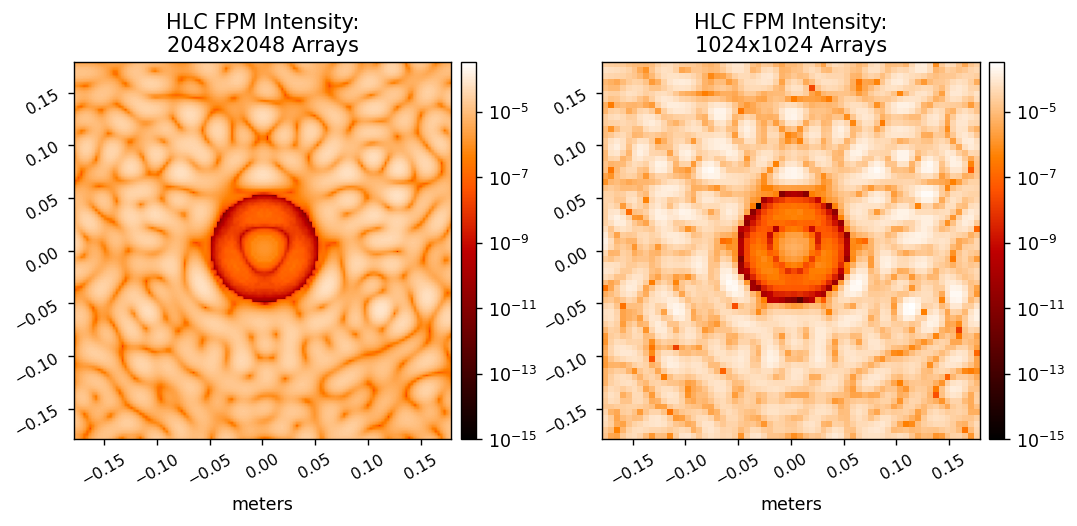

In [88]:
misc.myimshow2(np.abs(onax_fpm.wavefront)**2, np.abs(offax_fpm.wavefront)**2,
               'HLC FPM Intensity:\n2048x2048 Arrays', 'HLC FPM Intensity:\n1024x1024 Arrays',
               npix1=128,npix2=64,
               cmap1='gist_heat', cmap2='gist_heat',
               lognorm1=True, lognorm2=True, vmin1=1e-15, vmin2=1e-15, 
               vmax1=np.max(np.abs(offax_fpm.wavefront)**2), vmax2=np.max(np.abs(offax_fpm.wavefront)**2),
               pxscl1=onax_fpm.pixelscale.to(u.mm/u.pix), pxscl2=offax_fpm.pixelscale.to(u.mm/u.pix))